In [21]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-02-09 23:15:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.48.252, 2600:1413:b000:78a::317f, 2600:1413:b000:793::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.48.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M   262MB/s    in 3.0s    

2023-02-09 23:15:06 (262 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



In [45]:
#Import the modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
from keras_preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [46]:
#Create dataframe input and output

input_path=[]
label=[]

for cls in os.listdir('PetImages'):
  for path in os.listdir('PetImages/'+cls):
    if cls=='Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join('PetImages',cls,path))
print(input_path[10000],label[10000])



PetImages/Dog/8738.jpg 1


In [47]:
len(label)

25002

In [48]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Cat/11594.jpg      0
1   PetImages/Cat/8721.jpg      0
2   PetImages/Cat/3593.jpg      0
3    PetImages/Dog/981.jpg      1
4  PetImages/Dog/11348.jpg      1

In [49]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [50]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)

In [51]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

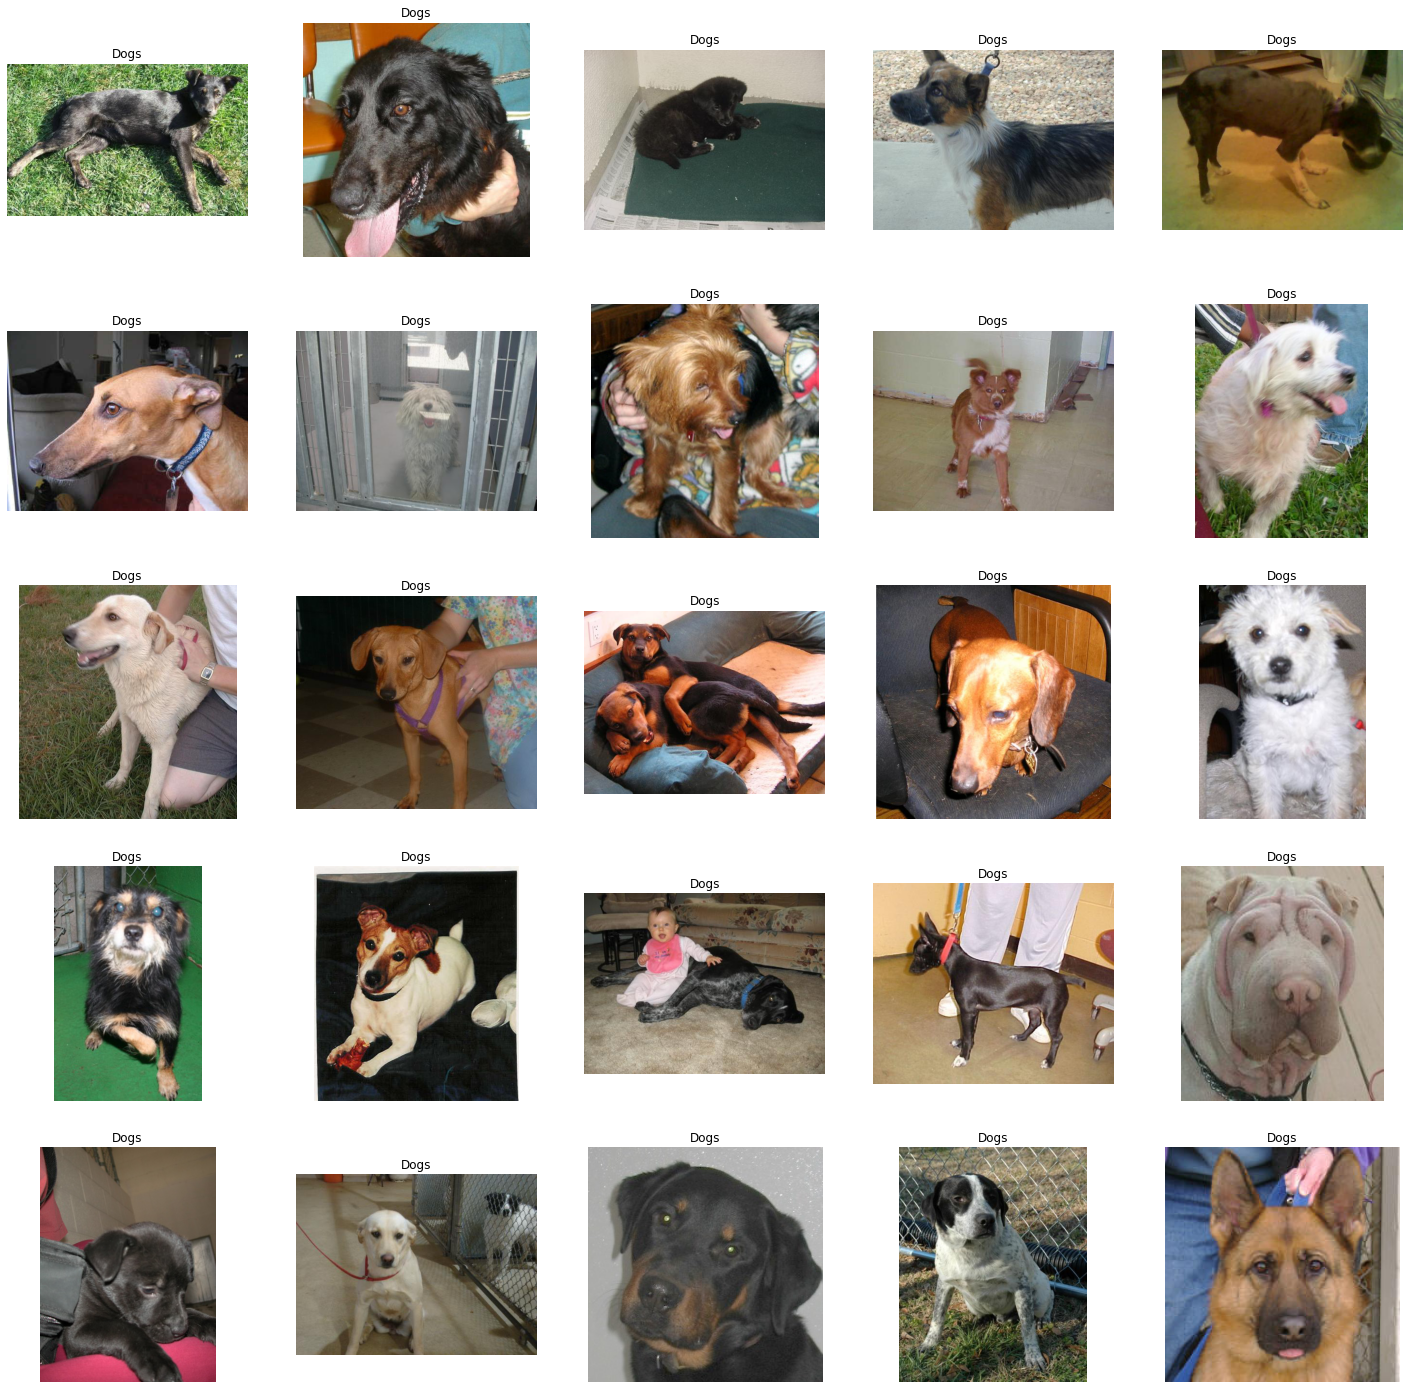

In [52]:
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
start=np.random.randint(0,len(temp))
files=temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')


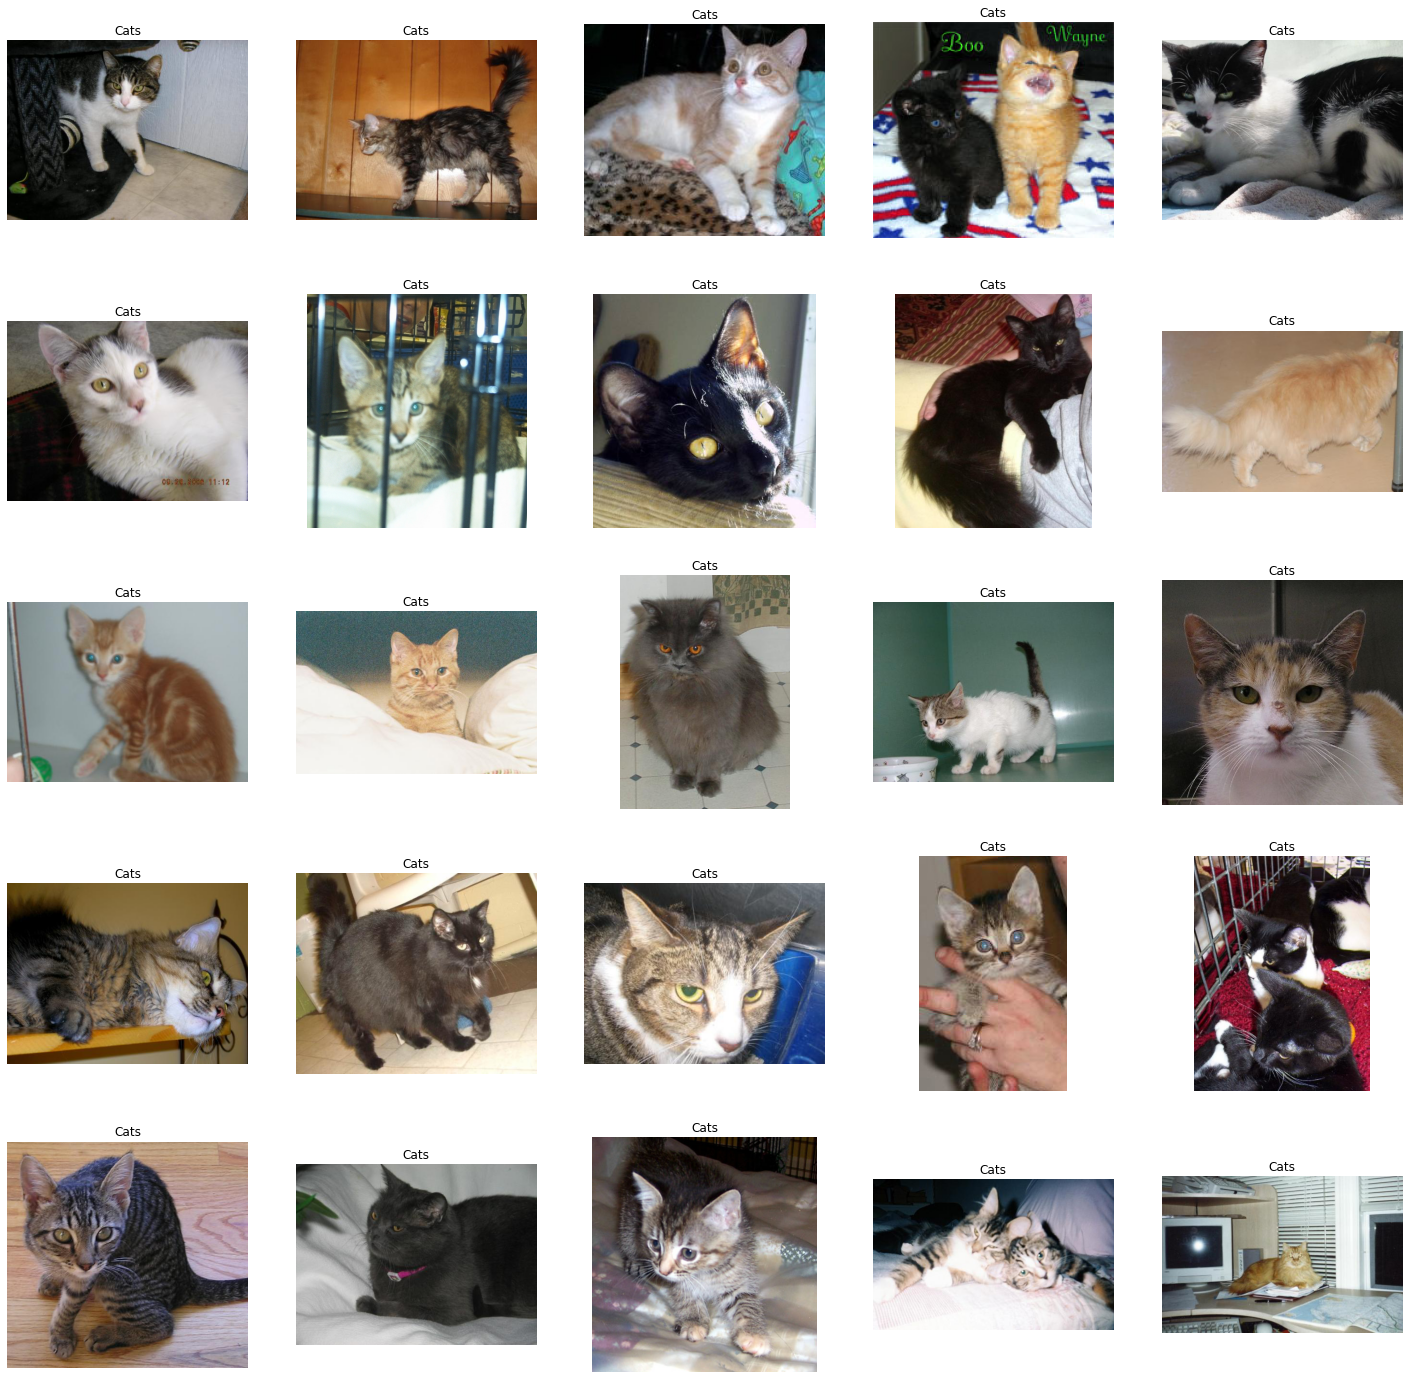

In [53]:
plt.figure(figsize=(25,25))
temp=df[df['label']!=1]['images']
start=np.random.randint(0,len(temp))
files=temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

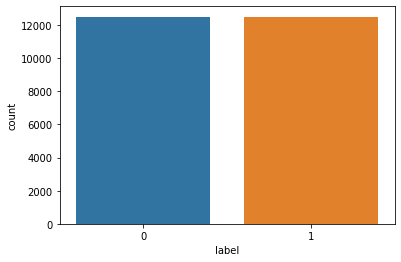

In [54]:
import seaborn as sns
sns.countplot(df['label'])

In [55]:
df['label']=df['label'].astype('str')
df.head()

images label
0  PetImages/Cat/11594.jpg     0
1   PetImages/Cat/8721.jpg     0
2   PetImages/Cat/3593.jpg     0
3    PetImages/Dog/981.jpg     1
4  PetImages/Dog/11348.jpg     1

In [56]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [57]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [36]:
#Model Creation

In [58]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [60]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 141s 3s/step - loss: 0.7555 - accuracy: 0.5351 - val_loss: 0.6730 - val_accuracy: 0.5440
Epoch 2/10
40/40 [==============================] - 139s 3s/step - loss: 0.6628 - accuracy: 0.6083 - val_loss: 0.6307 - val_accuracy: 0.6374
Epoch 3/10
40/40 [==============================] - 137s 3s/step - loss: 0.6074 - accuracy: 0.6688 - val_loss: 0.6030 - val_accuracy: 0.6674
Epoch 4/10
40/40 [==============================] - 137s 3s/step - loss: 0.5662 - accuracy: 0.7078 - val_loss: 0.5217 - val_accuracy: 0.7366
Epoch 5/10
40/40 [==============================] - 134s 3s/step - loss: 0.5296 - accuracy: 0.7338 - val_loss: 0.5202 - val_accuracy: 0.7388
Epoch 6/10
40/40 [==============================] - 133s 3s/step - loss: 0.5212 - accuracy: 0.7395 - val_loss: 0.4710 - val_accuracy: 0.7700
Epoch 7/10
40/40 [==============================] - 134s 3s/step - loss: 0.4953 - accuracy: 0.7561 - val_loss: 0.4627 - val_accuracy: 0.7762
Epoch 8/10
40

In [62]:
image_path = "/content/cattest.jpeg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 19ms/step
Cat
